In [1]:
import numpy as np
from scipy.optimize import *

In [2]:
P = np.polynomial.Polynomial([0, 0, 1])

In [3]:
x = np.arange(10)


In [4]:
P(x)

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

In [45]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 - np.log(np.absolute(1-x[:-1])+1))

In [46]:
x0 = np.array([0.3, 0.7, 10.8, 1.9, -1.2])
bounds = Bounds([0, -0.5, 10.0, -5.0, -12.0], [1.0, 2.0, 13.0, 15.0, 0.4])

In [47]:
res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True}, bounds=bounds)

Optimization terminated successfully.
         Current function value: 948722.005879
         Iterations: 180
         Function evaluations: 343


In [48]:
print(res.x)

[ 1.          2.         10.          3.67500023  0.4       ]


In [1]:
import pandas as pd

In [182]:
data_GDP = pd.read_csv('data/gross-domestic-product.csv')
data_GDP = data_GDP.drop(['Code'], axis=1)
data_GDP = data_GDP[data_GDP['Year'] >= 1995]
data_GDP = data_GDP[data_GDP['Year'] <= 2020]
# data_CO2 = data_GDP[data_GDP['Entity'] != 'World']

data_GDP.columns = ['Entity', 'Year', 'GDP']

data_CO2 = pd.read_csv('data/annual-co-emissions-by-region.csv')
data_CO2 = data_CO2.drop(['Code'], axis=1)
data_CO2 = data_CO2[data_CO2['Year'] >= 1995]
data_CO2 = data_CO2[data_CO2['Year'] <= 2020]
# data_CO2 = data_CO2[data_CO2['Entity'] != 'World']

data_CO2.columns = ['Entity', 'Year', 'CO2']

In [183]:
list_contry = data_GDP['Entity'].unique().tolist()
data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry)]
list_contry_2 = data_CO2['Entity'].unique().tolist()
data_GDP = data_GDP[ data_GDP['Entity'].isin(list_contry_2)]

data_CO2 = data_CO2.reset_index(drop=True)
data_GDP = data_GDP.reset_index(drop=True)


In [184]:
data_CO2.to_csv('data/data_CO2.csv')
data_GDP.to_csv('data/data_GDP.csv')

In [185]:
data_CO2_GDP = pd.merge(data_CO2,data_GDP)
data_CO2_GDP.to_csv('data/data_CO2_GDP.csv')

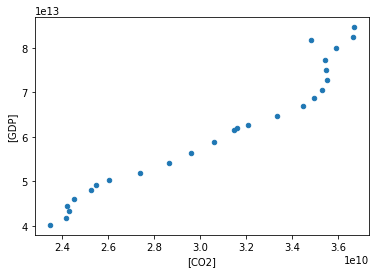

In [193]:
new_data = data_CO2_GDP.loc[data_CO2_GDP['Entity'] == 'World']
new_data.plot.scatter(x=['CO2'], y=['GDP'])


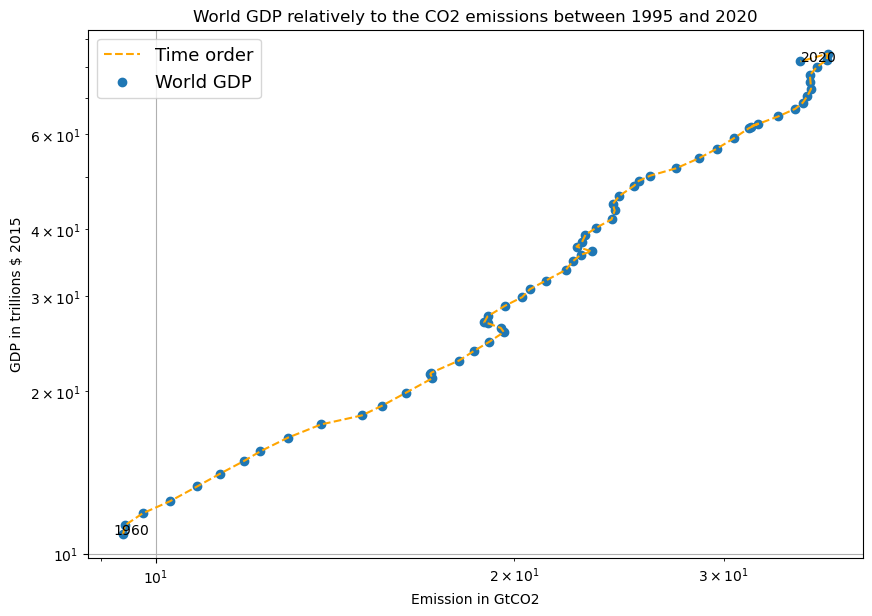

In [62]:
min_year = 1900
data_GDP = pd.read_csv('data/gross-domestic-product.csv')
data_GDP = data_GDP.drop(['Code'], axis=1)
data_GDP = data_GDP[data_GDP['Year'] >=  min_year]
data_GDP = data_GDP[data_GDP['Year'] <= 2020]
# data_CO2 = data_GDP[data_GDP['Entity'] != 'World']

data_GDP.columns = ['Entity', 'Year', 'GDP']

data_CO2 = pd.read_csv('data/annual-co-emissions-by-region.csv')
data_CO2 = data_CO2.drop(['Code'], axis=1)
data_CO2 = data_CO2[data_CO2['Year'] >= min_year]
data_CO2 = data_CO2[data_CO2['Year'] <= 2020]
# data_CO2 = data_CO2[data_CO2['Entity'] != 'World']

data_CO2.columns = ['Entity', 'Year', 'CO2']

list_contry = data_GDP['Entity'].unique().tolist()
data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry)]
list_contry_2 = data_CO2['Entity'].unique().tolist()
data_GDP = data_GDP[ data_GDP['Entity'].isin(list_contry_2)]

data_CO2 = data_CO2.reset_index(drop=True)
data_GDP = data_GDP.reset_index(drop=True)

data_CO2_GDP = pd.merge(data_CO2,data_GDP)

new_data = data_CO2_GDP.loc[data_CO2_GDP['Entity'] == 'World']

x = new_data['CO2'].to_numpy()/ 1E9
y = new_data['GDP'].to_numpy()/ 1E12

import matplotlib.pyplot as plt

plt.figure(dpi = 100, figsize=(10,7))
plt.grid('both')
plt.plot(x,y, '--', c='orange', label='Time order')
plt.scatter(x,y, label='World GDP')
plt.text(x[0]- .02*x[0], y[0], '${}$'.format(t[0]))

plt.text(x[-1]-.01, y[-1], '${}$'.format(t[-1]))
# plt.yticks(np.arange(40, 90, step=5))
# plt.xticks(np.arange(23, 38, step=1))
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Emission in GtCO2')
plt.ylabel('GDP in trillions $ 2015')
plt.title('World GDP relatively to the CO2 emissions between 1995 and 2020')

plt.legend(prop={'size': 13})
# plt.savefig('plots/plot_GDP_CO2.pdf', format='pdf')
plt.show()

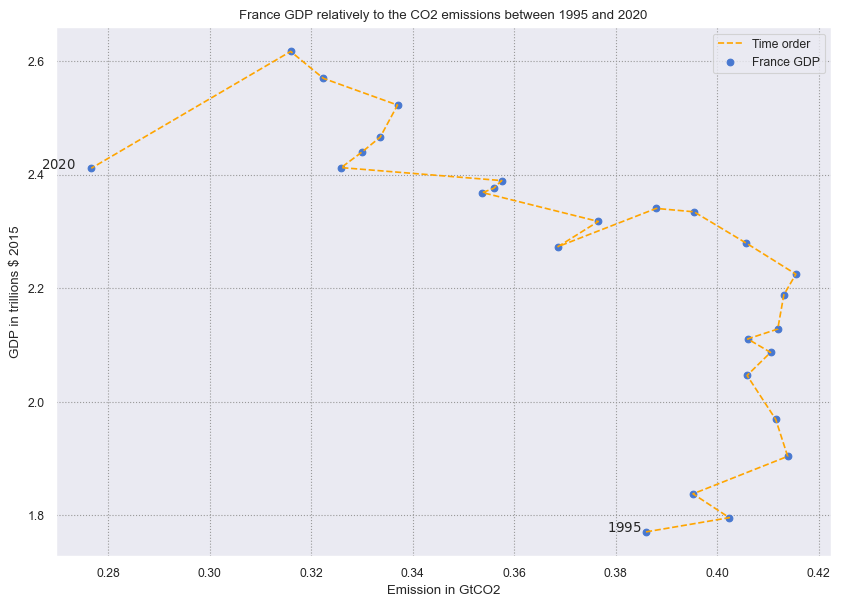

In [151]:
data_GDP = pd.read_csv('data/gross-domestic-product.csv')
data_GDP = data_GDP.drop(['Code'], axis=1)
data_GDP = data_GDP[data_GDP['Year'] >= 1995]
data_GDP = data_GDP[data_GDP['Year'] <= 2020]
# data_CO2 = data_GDP[data_GDP['Entity'] != 'World']

data_GDP.columns = ['Entity', 'Year', 'GDP']

data_CO2 = pd.read_csv('data/annual-co-emissions-by-region.csv')
data_CO2 = data_CO2.drop(['Code'], axis=1)
data_CO2 = data_CO2[data_CO2['Year'] >= 1995]
data_CO2 = data_CO2[data_CO2['Year'] <= 2020]
# data_CO2 = data_CO2[data_CO2['Entity'] != 'World']

data_CO2.columns = ['Entity', 'Year', 'CO2']

list_contry = data_GDP['Entity'].unique().tolist()
data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry)]
list_contry_2 = data_CO2['Entity'].unique().tolist()
data_GDP = data_GDP[ data_GDP['Entity'].isin(list_contry_2)]

data_CO2 = data_CO2.reset_index(drop=True)
data_GDP = data_GDP.reset_index(drop=True)

data_CO2_GDP = pd.merge(data_CO2,data_GDP)

contry = 'France'

new_data = data_CO2_GDP.loc[data_CO2_GDP['Entity'] == contry ]

x = new_data['CO2'].to_numpy()/ 1E9
y = new_data['GDP'].to_numpy()/ 1E12

import matplotlib.pyplot as plt

plt.figure(dpi = 100, figsize=(10,7))
plt.grid('both')
plt.plot(x,y, '--', c='orange', label='Time order')
plt.scatter(x,y, label='{} GDP'.format(contry))
plt.text(x[0]- .02*x[0], y[0], '$1995$')

plt.text(x[-1]-.01, y[-1], '$2020$')

plt.xlabel('Emission in GtCO2')
plt.ylabel('GDP in trillions $ 2015')
plt.title('{} GDP relatively to the CO2 emissions between 1995 and 2020'.format(contry))

plt.legend()
plt.show()

In [ ]:
def polynomFit(X):
    x,y = X 

In [152]:
import numpy as np
from scipy.optimize import curve_fit

def func(X, a, b, c):
    x,y = X
    return np.log(a) + b*np.log(x) + c*np.log(y)

# some artificially noisy data to fit
x = np.linspace(0.1,1.1,101)
y = np.linspace(1.,2., 101)
a, b, c = 10., 4., 6.
z = func((x,y), a, b, c) * 1 + np.random.random(101) / 100

# initial guesses for a,b,c:
p0 = 8., 2., 7.
print(curve_fit(func, (x,y), z, p0))

(array([10.1097164 ,  4.00281896,  5.99076451]), array([[ 1.86044651e-03,  9.81209900e-05, -3.04580743e-04],
       [ 9.81209900e-05,  5.28562438e-06, -1.59831337e-05],
       [-3.04580743e-04, -1.59831337e-05,  5.03494712e-05]]))


ValueError: x and y must have same first dimension, but have shapes (101,) and (3,)

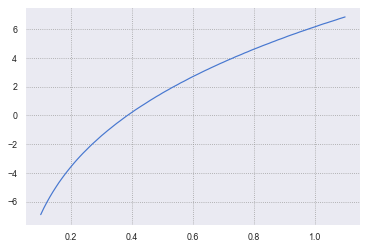

In [ ]:
data_GDP = pd.read_csv('data/gross-domestic-product.csv')
data_GDP = data_GDP.drop(['Code'], axis=1)
data_GDP = data_GDP[data_GDP['Year'] >= 1995]
data_GDP = data_GDP[data_GDP['Year'] <= 2020]
# data_CO2 = data_GDP[data_GDP['Entity'] != 'World']

data_GDP.columns = ['Entity', 'Year', 'GDP']

data_CO2 = pd.read_csv('data/annual-co-emissions-by-region.csv')
data_CO2 = data_CO2.drop(['Code'], axis=1)
data_CO2 = data_CO2[data_CO2['Year'] >= 1995]
data_CO2 = data_CO2[data_CO2['Year'] <= 2020]
# data_CO2 = data_CO2[data_CO2['Entity'] != 'World']

data_CO2.columns = ['Entity', 'Year', 'CO2']


data_POP = pd.read_csv('data/population-since-1800.csv')
data_POP = data_POP.drop(['Code'], axis=1)
data_POP = data_POP[data_POP['Year'] >= 1995]
data_POP = data_POP[data_POP['Year'] <= 2020]

data_POP.columns = ['Entity', 'Year', 'CO2']

list_contry = data_GDP['Entity'].unique().tolist()
data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry)]
list_contry_2 = data_CO2['Entity'].unique().tolist()
data_GDP = data_GDP[ data_GDP['Entity'].isin(list_contry_2)]

data_CO2 = data_CO2.reset_index(drop=True)
data_GDP = data_GDP.reset_index(drop=True)

data_CO2_GDP = pd.merge(data_CO2,data_GDP)
data_CO2_GDP_POP = pd.merge(data_CO2_GDP, data_POP)
# list_contry = ['China', 'United States', 'India']



import matplotlib.pyplot as plt


for contry in list_contry_2:
    plt.figure(dpi = 100, figsize=(12,9))
    plt.grid('both')
    new_data = data_CO2_GDP.loc[data_CO2_GDP['Entity'] == contry ]

    x = new_data['CO2'].to_numpy()/ 1E9
    y = new_data['GDP'].to_numpy()/ 1E12
    plt.plot(x,y, '--', c='black')
    plt.scatter(x,y, label='{} GDP'.format(contry))
    plt.text(x[0]- .02*x[0], y[0], '$1995$')

    plt.text(x[-1]-.01, y[-1], '$2020$')

    plt.xlabel('Emission in GtCO2')
    plt.ylabel('GDP in trillions $ 2015')
    plt.title('GDP relatively to the CO2 emissions between 1995 and 2020')

    plt.legend()
    plt.savefig('plots/plots_GDP_vs_CO2/{}_from_{}_to_{}.jpg'.format(contry, 1995, 2020), format='png')
plt.show()

In [268]:
data_GDP = pd.read_csv('data/gross-domestic-product.csv')
data_GDP = data_GDP.drop(['Code'], axis=1)
data_GDP = data_GDP[data_GDP['Year'] >= 1995]
data_GDP = data_GDP[data_GDP['Year'] <= 2020]
# data_CO2 = data_GDP[data_GDP['Entity'] != 'World']

data_GDP.columns = ['Entity', 'Year', 'GDP']

data_CO2 = pd.read_csv('data/annual-co-emissions-by-region.csv')
data_CO2 = data_CO2.drop(['Code'], axis=1)
data_CO2 = data_CO2[data_CO2['Year'] >= 1995]
data_CO2 = data_CO2[data_CO2['Year'] <= 2020]
# data_CO2 = data_CO2[data_CO2['Entity'] != 'World']

data_CO2.columns = ['Entity', 'Year', 'CO2']


data_POP = pd.read_csv('data/world-population-by-world-regions-post-1820.csv')
data_POP = data_POP.drop(['Code'], axis=1)
data_POP = data_POP[data_POP['Year'] >= 1995]
data_POP = data_POP[data_POP['Year'] <= 2020]

data_POP.columns = ['Entity', 'Year', 'POP']

list_contry = data_GDP['Entity'].unique().tolist()
data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry)]
data_POP = data_POP[ data_POP['Entity'].isin(list_contry)]

list_contry_2 = data_CO2['Entity'].unique().tolist()
data_GDP = data_GDP[ data_GDP['Entity'].isin(list_contry_2)]
data_POP = data_POP[ data_POP['Entity'].isin(list_contry_2)]

list_contry_3 = data_POP['Entity'].unique().tolist()
data_GDP = data_GDP[ data_GDP['Entity'].isin(list_contry_3)]
data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry_3)]



data_CO2 = data_CO2.reset_index(drop=True)
data_GDP = data_GDP.reset_index(drop=True)
data_POP = data_POP.reset_index(drop=True)

data_CO2_GDP = pd.merge(data_CO2,data_GDP)
data_CO2_GDP_POP = pd.merge(data_CO2_GDP, data_POP)
# list_contry = ['China', 'United States', 'India']

import matplotlib.pyplot as plt


for contry in list_contry_3:
    plt.figure(dpi = 100, figsize=(12,9))
    plt.grid('both')
    new_data = data_CO2_GDP.loc[data_CO2_GDP['Entity'] == contry ]
    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() /p
    y = new_data['GDP'].to_numpy() /p
    plt.plot(x,y, '--', c='black')
    plt.scatter(x,y, label='{} GDP'.format(contry))
    plt.text(x[0]- .02*x[0], y[0], '${}$'.format(t[0]))

    plt.text(x[-1]-.01, y[-1], '${}$'.format(t[-1]))

    plt.xlabel('Emission in GtCO2 per Capita')
    plt.ylabel('GDP per Capita in trillions $ 2015')
    plt.title('GDP per relatively to the CO2 emissions between 1995 and 2020')

    plt.legend()
    plt.savefig('plots/plots_GDPperCapita_vs_CO2perCapita/{}_from_{}_to_{}.jpg'.format(contry, t[0], t[-1]), format='png')


In [270]:
data_CO2_GDP_POP

,Entity,Year,CO2,GDP,POP
0,Afghanistan,2002,1051609,7228792320,22600774
1,Afghanistan,2003,1185951,7867259392,23680871
2,Afghanistan,2004,889167,7978511360,24726689
3,Afghanistan,2005,1303267,8874475520,25654274
4,Afghanistan,2006,1635378,9349916672,26433058
...,...,...,...,...,...
5041,Zimbabwe,2016,10737567,20114016256,14030338
5042,Zimbabwe,2017,9581633,21061283840,14236599
5043,Zimbabwe,2018,11854367,22077325312,14438812
5044,Zimbabwe,2019,10949084,20720840704,14645473


In [57]:
list_EU = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

data_POP = pd.read_csv('data/world-population-by-world-regions-post-1820.csv')
data_POP = data_POP.drop(['Code'], axis=1)
data_POP = data_POP[data_POP['Year'] >= 1960]
data_POP = data_POP[data_POP['Year'] <= 2020]

data_POP_EU = data_POP[data_POP['Entity'].isin(list_EU)]

import numpy as np
data_POP_UE = data_POP_EU.groupby('Year').sum()
data_POP_UE.insert(0,'Entity', 'European Union')
data_POP_UE.insert(1,'Year', np.arange(1960,2021))

data_POP_UE.reset_index(drop=True)

data_POP_modified = pd.concat([data_POP.reset_index(drop=True)
, data_POP_UE.reset_index(drop=True)])
data_POP_modified = data_POP_modified.reset_index(drop=True)
data_POP_modified = data_POP_modified.sort_values(['Entity', 'Year'], ascending=True).reset_index(drop=True)
data_POP_modified.columns = ['Entity', 'Year', 'POP']
data_POP_modified.to_csv('data/data_POP.csv', index=False)

In [68]:
import pandas as pd

data_GDPperCapita = pd.read_csv('data/real-gdp-per-capita-PennWT.csv')
data_GDPperCapita = data_GDPperCapita.drop(['Code'], axis=1)
data_GDPperCapita = data_GDPperCapita[data_GDPperCapita['Year'] >= 1995]
data_GDPperCapita = data_GDPperCapita[data_GDPperCapita['Year'] <= 2020]
# data_CO2 = data_GDP[data_GDP['Entity'] != 'World']

data_GDPperCapita.columns = ['Entity', 'Year', 'GDP']

data_CO2 = pd.read_csv('data/annual-co-emissions-by-region.csv')
data_CO2 = data_CO2.drop(['Code'], axis=1)
data_CO2 = data_CO2[data_CO2['Year'] >= 1995]
data_CO2 = data_CO2[data_CO2['Year'] <= 2020]
# data_CO2 = data_CO2[data_CO2['Entity'] != 'World']

data_CO2.columns = ['Entity', 'Year', 'CO2']


data_POP = pd.read_csv('data/world-population-by-world-regions-post-1820.csv')
data_POP = data_POP.drop(['Code'], axis=1)
data_POP = data_POP[data_POP['Year'] >= 1995]
data_POP = data_POP[data_POP['Year'] <= 2020]

data_POP.columns = ['Entity', 'Year', 'POP']

list_contry = data_GDPperCapita['Entity'].unique().tolist()
data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry)]
data_POP = data_POP[ data_POP['Entity'].isin(list_contry)]

list_contry_2 = data_CO2['Entity'].unique().tolist()
data_GDPperCapita = data_GDPperCapita[ data_GDPperCapita['Entity'].isin(list_contry_2)]
data_POP = data_POP[ data_POP['Entity'].isin(list_contry_2)]

list_contry_3 = data_POP['Entity'].unique().tolist()
data_GDPperCapita = data_GDPperCapita[ data_GDPperCapita['Entity'].isin(list_contry_3)]
data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry_3)]



data_CO2 = data_CO2.reset_index(drop=True)
data_GDPperCapita = data_GDPperCapita.reset_index(drop=True)
data_POP = data_POP.reset_index(drop=True)

data_CO2_GDPperCapita = pd.merge(data_CO2,data_GDPperCapita)
data_CO2_GDPperCapita_POP = pd.merge(data_CO2_GDPperCapita, data_POP)

IndexError: index 0 is out of bounds for axis 0 with size 0

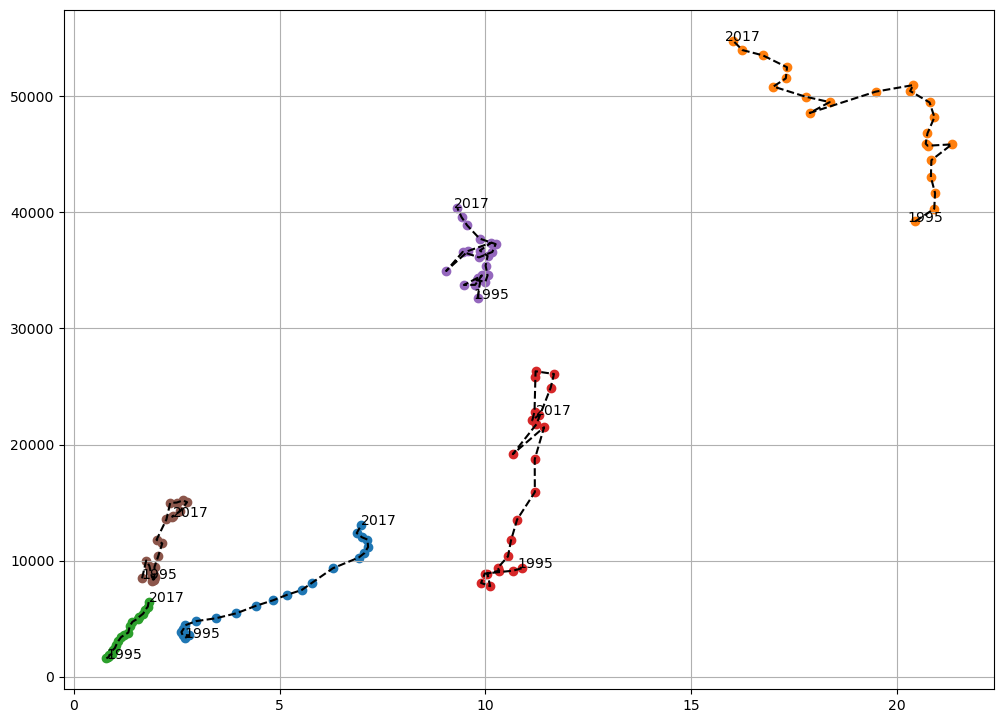

In [69]:
import matplotlib.pyplot as plt

LIST_COUNTRIES = ['China','United States', 'India', 'Russia', 'Japan', 'Brazil', 'European Union']

plt.figure(dpi = 100, figsize=(12,9))
plt.grid('both')
for contry in LIST_COUNTRIES:

    new_data = data_CO2_GDPperCapita_POP.loc[data_CO2_GDPperCapita_POP['Entity'] == contry ]
    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() /p
    y = new_data['GDP'].to_numpy() 
    plt.plot(x,y, '--', c='black')
    plt.scatter(x,y, label='{} GDP'.format(contry))
    plt.text(x[0]- .01*x[0], y[0], '${}$'.format(t[0]))

    plt.text(x[-1]-.01*x[1], y[-1], '${}$'.format(t[-1]))

plt.xlabel('Emission in tons CO2 per Capita')
plt.ylabel('GDP per Capita in $ 2011')
plt.title('GDP per relatively to the CO2 emissions between 1995 and 2017')

plt.legend()
    # plt.savefig('plots/plots_GDPperCapita_vs_CO2perCapita/{}_from_{}_to_{}.jpg'.format(contry, t[0], t[-1]), format='png')
plt.show()

In [ ]:
USA	 =  ['United States']
CAN	 =  ['Canada']
JPK  =  ['Japan', 'South Korea']
ANZ  =  ['Australia', 'New Zealand']
CEE  =  ['Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'FYR Macedonia', 'Poland', 'Romania', 'Slovakia', 'Slovenia', 'Yugoslavia']
FSU	 =	['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
MDE	 = 	['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'West Bank and Gaza', 'Yemen']
CAM	 = 	['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama']
SAM	 =	['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
SAS	 =  ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']
SEA	 =	['Brunei', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Papua New Guinea', 'Philippines', 'Singapore', 'Taiwan', 'Thailand', 'Vietnam']
CHI	 =  ['China', 'Hong Kong', 'North Korea', 'Macau', 'Mongolia']
NAF	 =	['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara']
SSA	 =	['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Congo-Brazzaville', 'Congo-Kinshasa', 'Cote d’Ivoire', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea- Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']
SIS	 =  ['Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Bermuda', 'Comoros', 'Cuba', 'Dominica', 'Dominican Republic', 'Fiji', 'French Polynesia', 'Grenada', 'Guadeloupe', 'Haiti', 'Jamaica', 'Kiribati', 'Maldives', 'Marshall Islands', 'Martinique', 'Mauritius', 'Micronesia', 'Nauru', 'Netherlands Antilles', 'New Caledonia', 'Palau', 'Puerto Rico', 'Reunion', 'Samoa', 'Sao Tome and Principe', 'Seychelles', 'Solomon Islands', 'St Kitts and Nevis', 'St Lucia', 'St Vincent and Grenadines', 'Tonga', 'Trinidad and Tobago', 'Tuvalu', 'Vanuatu', 'Virgin Islands']
WEU  =  ['Andorra', 'Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Liechtenstein', 'Luxembourg', 'Malta', 'Monaco', 'Netherlands', 'Norway', 'Portugal', 'San Marino', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']

In [2]:
import pandas as pd

min_year = 1750
data_GDP = pd.read_csv('data/maddison-data-gdp-per-capita-in-2011us.csv')

data_GDP = data_GDP.drop(['Code', '417485-annotations'], axis=1)
data_GDP = data_GDP[data_GDP['Year'] >= min_year]
# data_GDP = data_GDP[data_GDP['Year'] <= 2020]
# data_CO2 = data_GDP[data_GDP['Entity'] != 'World']

data_GDP.columns = ['Entity', 'Year', 'GDP']

data_CO2 = pd.read_csv('data/annual-co-emissions-by-region.csv')
data_CO2 = data_CO2.drop(['Code'], axis=1)
data_CO2 = data_CO2[data_CO2['Year'] >= min_year]
# data_CO2 = data_CO2[data_CO2['Year'] <= 2020]
# data_CO2 = data_CO2[data_CO2['Entity'] != 'World']

data_CO2.columns = ['Entity', 'Year', 'CO2']


data_POP = pd.read_csv('data/world-population-by-world-regions-post-1820.csv')
data_POP = data_POP.drop(['Code'], axis=1)
data_POP = data_POP[data_POP['Year'] >= min_year]
# data_POP = data_POP[data_POP['Year'] <= 2020]

data_POP.columns = ['Entity', 'Year', 'POP']

# data_POP = pd.read_csv('data/data_POP.csv')

# list_contry = data_GDP['Entity'].unique().tolist()
# data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry)]
# data_POP = data_POP[ data_POP['Entity'].isin(list_contry)]

# list_contry_2 = data_CO2['Entity'].unique().tolist()
# data_GDP = data_GDP[ data_GDP['Entity'].isin(list_contry_2)]
# data_POP = data_POP[ data_POP['Entity'].isin(list_contry_2)]

# list_contry_3 = data_POP['Entity'].unique().tolist()
# data_GDP = data_GDP[ data_GDP['Entity'].isin(list_contry_3)]
# data_CO2 = data_CO2[ data_CO2['Entity'].isin(list_contry_3)]



data_CO2 = data_CO2.reset_index(drop=True)
data_GDP = data_GDP.reset_index(drop=True)
data_POP = data_POP.reset_index(drop=True)

data_CO2_GDP = pd.merge(data_CO2,data_GDP, on=['Entity', 'Year'], how='left')
data_CO2_GDP_POP = pd.merge(data_CO2_GDP, data_POP, on=['Entity', 'Year'], how='left')

data_CO2_GDP_POP.dropna(inplace=True)

In [3]:
data_CO2_GDP_POP.to_csv('test.csv')

In [4]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

LIST_COUNTRIES = sorted(['China','United States', 'India', 'Russia', 'Japan', 'Brazil', 'France', 'Germany'])
min_year = 1900

list_contry = data_CO2_GDP_POP['Entity'].unique().tolist()
for contry in list_contry:
    print('Contry :', contry)

    plt.figure(figsize=(12, 6), dpi=100, tight_layout=True)
    # plt.grid('both')
    sns.set_style('darkgrid')

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]
    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() /p
    y = new_data['GDP'].to_numpy() 
    plt.plot(x,y, '--', c='black', alpha=0.2)
    plt.scatter(x,y, label='{}'.format(contry),cmap='viridis')
    # plt.text(x[0], y[0]*(1-0.2), '${}$'.format(t[0]))
    k =0
    for time in t:
        if k%10 ==0 :
            plt.text(x[k], y[k]*(1-0.02), '${}$'.format(t[k]))
        k += 1


    plt.text(x[-1], y[-1] *(1+0.02), '${}$'.format(t[-1]))

    plt.xlabel('Emission in tons CO2 per Capita')
    plt.ylabel('GDP per Capita in $ 2011')
    plt.xscale('log')
    plt.yscale('log')
    # plt.title('Evolution of GDP relatively to the CO2 emissions between 1995 and 2020')
    # plt.xticks(np.arange(new_data['CO2'].min(),new_data['CO2'].max(), (new_data['CO2'].min()-new_data['CO2'].max())//10))
    # plt.yticks(np.arange(new_data['GDP'].min(),new_data['GDP'].max(), (new_data['GDP'].min()-new_data['GDP'].max())//10), ['{:,}$'.format(i) for i in np.arange(0,64000,10000) ])
    plt.legend(prop={'size': 12})
    plt.savefig('plots/plots_list_contries_per_capita_long/{}_from_{}_to_{}.png'.format(contry, t[0], t[-1]), format='png')
    plt.close()

Contry : Afghanistan
Contry : Albania


C:\Users\anthony.couthures\AppData\Local\Temp\ipykernel_3772\3706090275.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('plots/plots_list_contries_per_capita_long/{}_from_{}_to_{}.png'.format(contry, t[0], t[-1]), format='png')


Contry : Algeria


C:\Users\anthony.couthures\AppData\Local\Temp\ipykernel_3772\3706090275.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('plots/plots_list_contries_per_capita_long/{}_from_{}_to_{}.png'.format(contry, t[0], t[-1]), format='png')


Contry : Angola


: 

: 

In [34]:
import matplotlib as mpl

mpl.rcdefaults()
sns.set_style('darkgrid',  {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("paper")
sns.set_palette("tab10")

sns.axes_style( { 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.bottom': True,
 'xtick.top': True,
 'ytick.left': True,
 'ytick.right': True})
# mpl.rc('text', usetex=True)
mpl.rc('ytick'  , labelsize=11)
mpl.rc('xtick'  , labelsize=11)
mpl.rc('legend' , fontsize= 13)
plt.rc('axes'   , labelsize=13) 


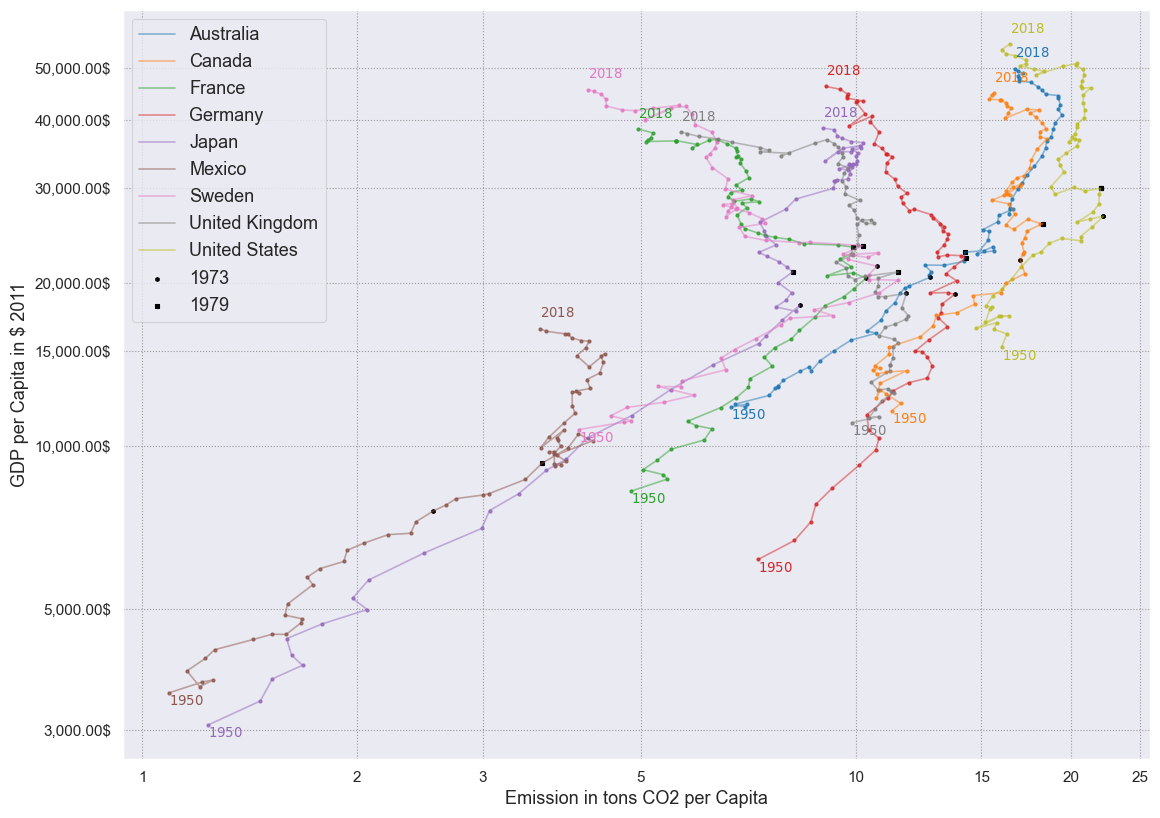

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

LIST_COUNTRIES_20K = sorted([ 'Australia', 'United States',  'Japan', 'France', 'Germany', 'United Kingdom', 'Canada', 'Sweden', 'Mexico'])

fig = plt.figure(figsize=(11.69,8.27), dpi=100, tight_layout=True)

ax = fig.gca()

min_year = 1950

for contry in LIST_COUNTRIES_20K:

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]
    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() /p
    y = new_data['GDP'].to_numpy() 

    p = ax.plot(x,y, label='{}'.format(contry), alpha=0.5)
    ax.scatter(x,y, color=p[0].get_color(), s=5, alpha = 0.8)

    ax.text(x[0], y[0]*(1-0.05), '${}$'.format(t[0]), color=p[0].get_color())
    ax.text(x[-1], y[-1]*(1+0.05), '${}$'.format(t[-1]), color=p[0].get_color())


    indice_1973 = np.where(t==1973)
    indice_1973 = indice_1973[0][0]
    ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8)

    indice_1979 = np.where(t==1979)
    indice_1979 = indice_1979[0][0]
    ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8)


indice_1973 = np.where(t==1973)
indice_1973 = indice_1973[0][0]
ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8, label='1973')

indice_1979 = np.where(t==1979)
indice_1979 = indice_1979[0][0]
ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8, label='1979')

ax.set_xlabel('Emission in tons CO2 per Capita')
ax.set_ylabel('GDP per Capita in $ 2011')

ax.set_xscale('log')
ax.set_xticks([1,2,3,5,10, 15, 20,25])
ax.set_xticklabels(['{:}'.format(i) for i in [1,2,3,5,10, 15, 20,25] ])

ytick= [3000, 5000,10000, 15000, 20000, 30000, 40000, 50000]
ax.set_yscale('log')
ax.set_yticks(ytick)
ax.set_yticklabels(['{:,.2f}$'.format(i) for i in ytick ])

plt.legend()
plt.savefig('plots/plots_list_contries_per_capita_long_log_20K.pdf', format='pdf')
plt.show()

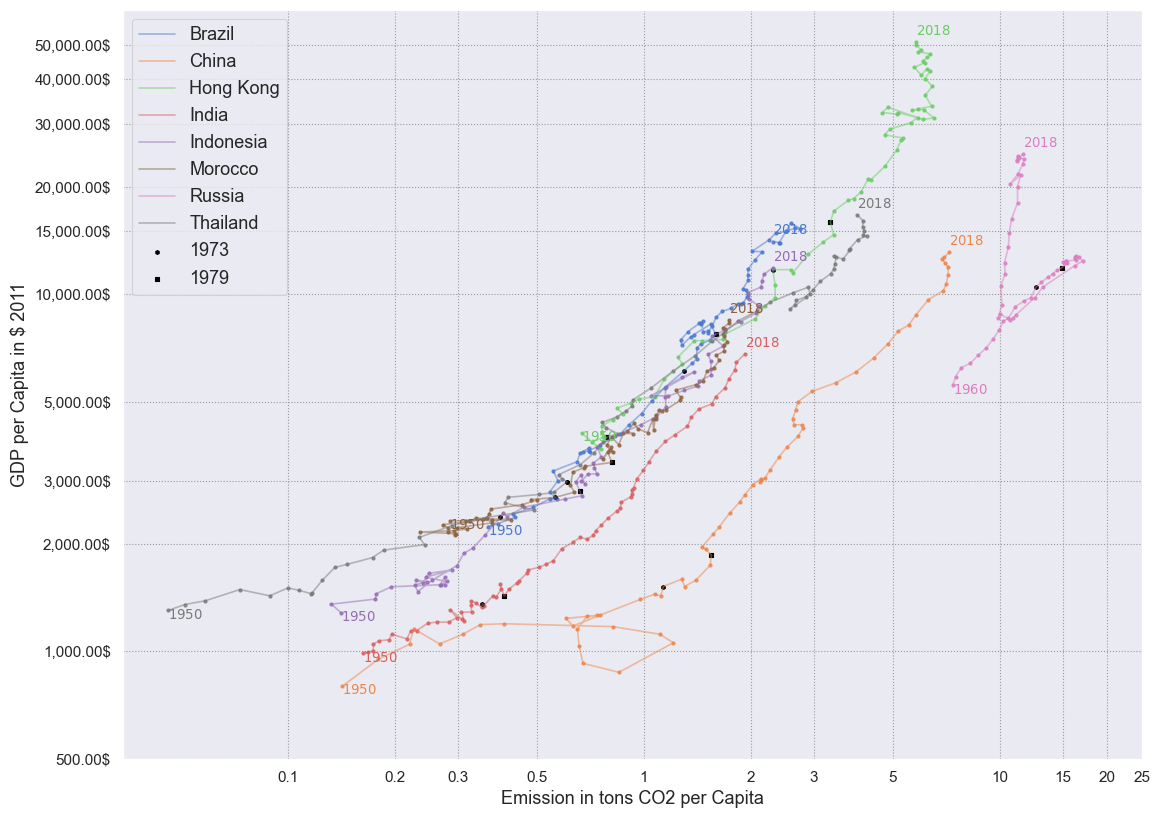

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns


LIST_COUNTRIES_1K = sorted([ 'China', 'India',  'Brazil', 'Russia', 'Hong Kong', 'Indonesia', 'Thailand', 'Morocco'])

fig = plt.figure(figsize=(11.69,8.27), dpi=100, tight_layout=True)
ax = fig.gca()


min_year = 1950

for contry in LIST_COUNTRIES_1K:

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]

    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() /p
    y = new_data['GDP'].to_numpy() 

    
    # plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy',scale=1., color='black', alpha = 0.2, lw=0.1)
    p = ax.plot(x,y, label='{}'.format(contry), alpha=0.5)
    ax.scatter(x,y, color=p[0].get_color(), s=5, alpha = 0.8)

    ax.text(x[0], y[0]*(1-0.05), '${}$'.format(t[0]), color=p[0].get_color())
    ax.text(x[-1], y[-1]*(1+0.05), '${}$'.format(t[-1]), color=p[0].get_color())

    indice_1973 = np.where(t==1973)
    indice_1973 = indice_1973[0][0]
    ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8)

    indice_1979 = np.where(t==1979)
    indice_1979 = indice_1979[0][0]
    ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8)



indice_1973 = np.where(t==1973)
indice_1973 = indice_1973[0][0]
ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8, label='1973')

indice_1979 = np.where(t==1979)
indice_1979 = indice_1979[0][0]
ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8, label='1979')

ax.set_xlabel('Emission in tons CO2 per Capita')
ax.set_ylabel('GDP per Capita in $ 2011')

    # plt.title('Evolution of GDP relatively to the CO2 emissions between 1995 and 2020')
# plt.xticks(np.arange(0,23,2))
xtick = [0.1,0.2,0.3,0.5, 1,2,3,5,10, 15, 20,25]
ax.set_xscale('log')
ax.set_xticks(xtick)
ax.set_xticklabels(['{:}'.format(i) for i in xtick ])

ytick= [500,1000, 2000, 3000, 5000,10000, 15000, 20000, 30000, 40000, 50000]
ax.set_yscale('log')
ax.set_yticks(ytick)
ax.set_yticklabels(['{:,.2f}$'.format(i) for i in ytick ])
# ax.yaxis.set_major_formatter(matplotlib.ticker.FixedLocator())

plt.legend()
plt.savefig('plots/plots_list_contries_per_capita_long_log_1K.pdf', format='pdf')
plt.show()

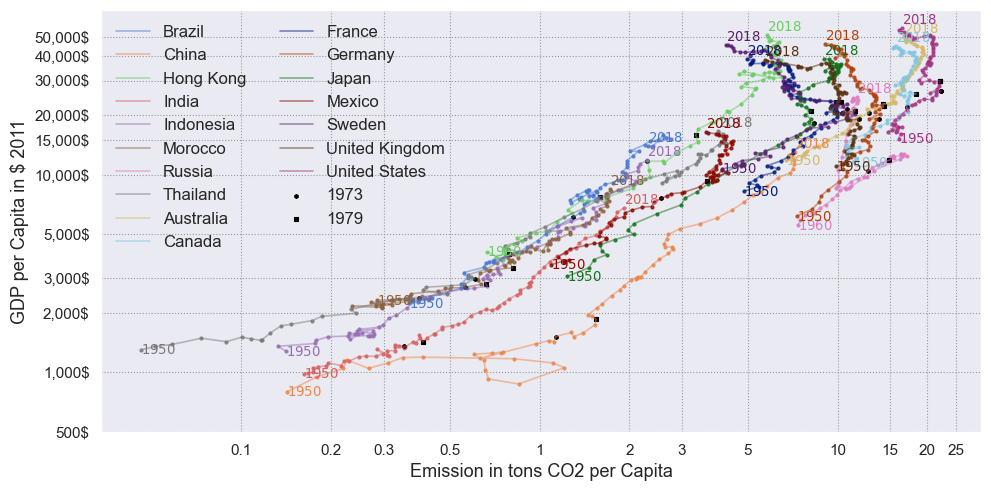

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns


fig = plt.figure(figsize=(10, 5), dpi=100, tight_layout=True)
tab = sns.color_palette("muted")
dark = sns.color_palette("dark")
palette = tab + dark
sns.set_palette(palette)

ax = fig.gca()

min_year = 1950

for contry in LIST_COUNTRIES_1K:

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]

    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() /p
    y = new_data['GDP'].to_numpy() 

    p = ax.plot(x,y, label='{}'.format(contry), alpha=0.5)
    ax.scatter(x,y, color=p[0].get_color(), s=5, alpha = 0.8)

    ax.text(x[0], y[0]*(1-0.05), '${}$'.format(t[0]), color=p[0].get_color())
    ax.text(x[-1], y[-1]*(1+0.05), '${}$'.format(t[-1]), color=p[0].get_color())

    indice_1973 = np.where(t==1973)
    indice_1973 = indice_1973[0][0]
    ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8)

    indice_1979 = np.where(t==1979)
    indice_1979 = indice_1979[0][0]
    ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8)


for contry in LIST_COUNTRIES_20K:

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]

    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() /p
    y = new_data['GDP'].to_numpy() 

    p = ax.plot(x,y, label='{}'.format(contry), alpha=0.5)
    ax.scatter(x,y, color=p[0].get_color(), s=5, alpha = 0.8)

    ax.text(x[0], y[0]*(1-0.05), '${}$'.format(t[0]), color=p[0].get_color())
    ax.text(x[-1], y[-1]*(1+0.05), '${}$'.format(t[-1]), color=p[0].get_color())

    indice_1973 = np.where(t==1973)
    indice_1973 = indice_1973[0][0]
    ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8)

    indice_1979 = np.where(t==1979)
    indice_1979 = indice_1979[0][0]
    ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8)


indice_1973 = np.where(t==1973)
indice_1973 = indice_1973[0][0]
ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8, label='1973')

indice_1979 = np.where(t==1979)
indice_1979 = indice_1979[0][0]
ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8, label='1979')

ax.set_xlabel('Emission in tons CO2 per Capita')
ax.set_ylabel('GDP per Capita in $ 2011')

xtick = [0.1,0.2,0.3,0.5, 1,2,3,5,10, 15, 20,25]
ax.set_xscale('log')
ax.set_xticks(xtick)
ax.set_xticklabels(['{:}'.format(i) for i in xtick ])

ytick= [500,1000, 2000, 3000, 5000,10000, 15000, 20000, 30000, 40000, 50000]
ax.set_yscale('log')
ax.set_yticks(ytick)
ax.set_yticklabels(['{:,}$'.format(i) for i in ytick ])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(ncol=2, framealpha=0, prop={'size': 12})
plt.savefig('plots/plots_list_contries_per_capita_long_log_all.pdf', format='pdf')
plt.show()

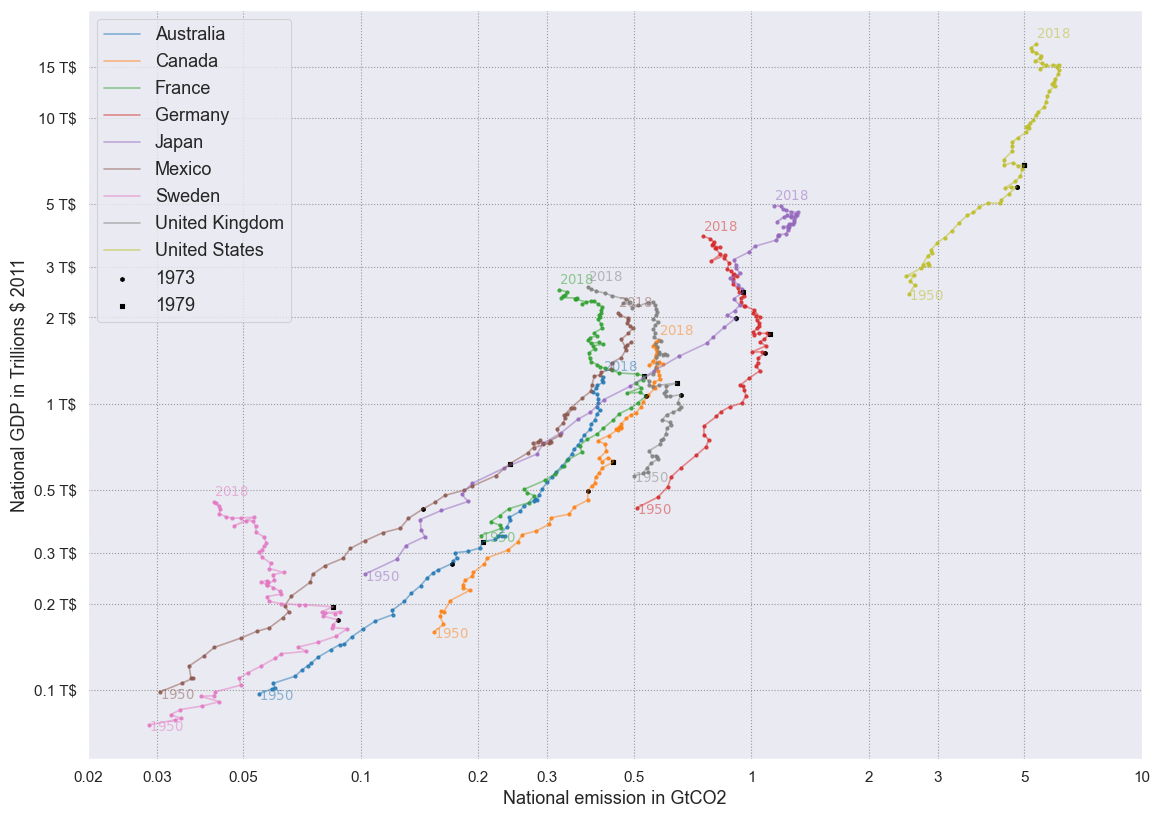

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns


# LIST_COUNTRIES_1K = sorted([ 'Australia', 'United States',  'Japan', 'France', 'Germany', 'United Kingdom', 'Canada', 'Sweden', 'Mexico',
# 'China', 'India',  'Brazil', 'Russia', 'Hong Kong', 'Indonesia', 'Thailand', 'Morocco'])

fig = plt.figure(figsize=(11.69,8.27), dpi=100, tight_layout=True)
tab = sns.color_palette("muted")
dark = sns.color_palette("dark")
palette = tab + dark
sns.set_palette("tab10")

ax = fig.gca()

min_year = 1950


for contry in LIST_COUNTRIES_20K:

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]

    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() / 1E9
    y = new_data['GDP'].to_numpy() *p / 1E12

    
    p = ax.plot(x,y, label='{}'.format(contry), alpha=0.5)
    ax.scatter(x,y, color=p[0].get_color(), s=5, alpha = 0.8)

    ax.text(x[0], y[0]*(1-0.05), '${}$'.format(t[0]), color=p[0].get_color(), alpha = 0.5)
    ax.text(x[-1], y[-1]*(1+0.05), '${}$'.format(t[-1]), color=p[0].get_color(), alpha = 0.5)

    indice_1973 = np.where(t==1973)
    indice_1973 = indice_1973[0][0]
    ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8)

    indice_1979 = np.where(t==1979)
    indice_1979 = indice_1979[0][0]
    ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8)


indice_1973 = np.where(t==1973)
indice_1973 = indice_1973[0][0]
ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8, label='1973')

indice_1979 = np.where(t==1979)
indice_1979 = indice_1979[0][0]
ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8, label='1979')

ax.set_xlabel('National emission in GtCO2')
ax.set_ylabel('National GDP in Trillions $ 2011')


xtick = [0.02, 0.03, 0.05, 0.1,0.2,0.3,0.5, 1,2,3,5,10]
ax.set_xscale('log')
ax.set_xticks(xtick)
ax.set_xticklabels(['{:}'.format(i) for i in xtick ])

ytick= [0.1,0.2,0.3,0.5, 1,2,3,5,10, 15]
ax.set_yscale('log')
ax.set_yticks(ytick)
ax.set_yticklabels(['{:,} T$'.format(i) for i in ytick ])

plt.legend()
plt.savefig('plots/plots_list_contries_long_log_20K.pdf', format='pdf')
plt.show()

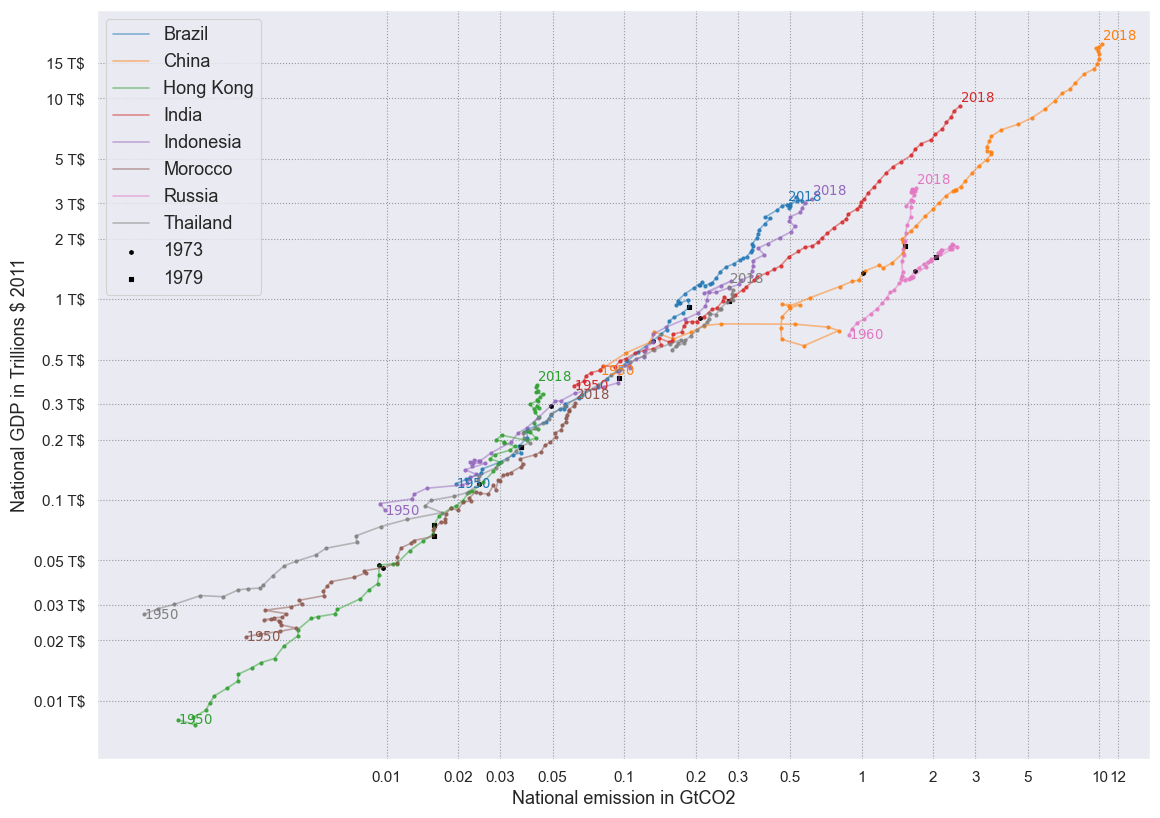

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns


fig = plt.figure(figsize=(11.69,8.27), dpi=100, tight_layout=True)

sns.set_palette("tab10")

ax = fig.gca()

min_year = 1950

for contry in LIST_COUNTRIES_1K:

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]

    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() / 1E9
    y = new_data['GDP'].to_numpy() *p / 1E12

    p = ax.plot(x,y, label='{}'.format(contry), alpha=0.5)
    ax.scatter(x,y, color=p[0].get_color(), s=5, alpha = 0.8)

    ax.text(x[0], y[0]*(1-0.05), '${}$'.format(t[0]), color=p[0].get_color())
    ax.text(x[-1], y[-1]*(1+0.05), '${}$'.format(t[-1]), color=p[0].get_color())

    indice_1973 = np.where(t==1973)
    indice_1973 = indice_1973[0][0]
    ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8)

    indice_1979 = np.where(t==1979)
    indice_1979 = indice_1979[0][0]
    ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8)


indice_1973 = np.where(t==1973)
indice_1973 = indice_1973[0][0]
ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8, label='1973')

indice_1979 = np.where(t==1979)
indice_1979 = indice_1979[0][0]
ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8, label='1979')

ax.set_xlabel('National emission in GtCO2')
ax.set_ylabel('National GDP in Trillions $ 2011')

xtick = [0.01, 0.02, 0.03, 0.05, 0.1,0.2,0.3,0.5, 1,2,3,5,10, 12]
ax.set_xscale('log')
ax.set_xticks(xtick)
ax.set_xticklabels(['{:}'.format(i) for i in xtick ])

ytick= [0.01, 0.02, 0.03, 0.05, 0.1,0.2,0.3,0.5, 1,2,3,5,10, 15]
ax.set_yscale('log')
ax.set_yticks(ytick)
ax.set_yticklabels(['{:,} T$'.format(i) for i in ytick ])

plt.legend()
plt.savefig('plots/plots_list_contries_long_log_1K.pdf', format='pdf')
plt.show()

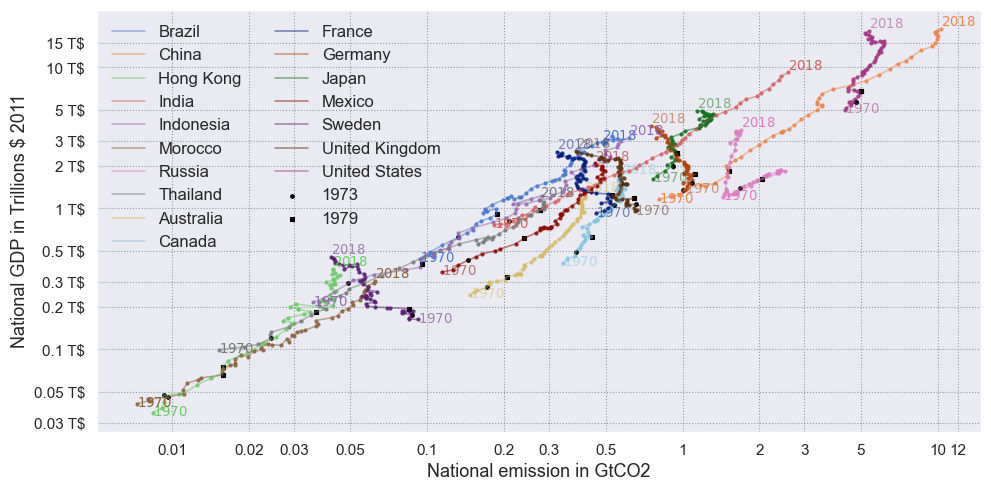

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns



fig = plt.figure(figsize=(10, 5), dpi=100, tight_layout=True)
tab = sns.color_palette("muted")
dark = sns.color_palette("dark")
palette = tab + dark
sns.set_palette(palette)

ax = fig.gca()

min_year = 1970

for contry in LIST_COUNTRIES_1K:

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]

    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() / 1E9
    y = new_data['GDP'].to_numpy() *p / 1E12

    p = ax.plot(x,y, label='{}'.format(contry), alpha=0.5)
    ax.scatter(x,y, color=p[0].get_color(), s=5, alpha = 0.8)

    ax.text(x[0], y[0]*(1-0.05), '${}$'.format(t[0]), color=p[0].get_color())
    ax.text(x[-1], y[-1]*(1+0.05), '${}$'.format(t[-1]), color=p[0].get_color())

    indice_1973 = np.where(t==1973)
    indice_1973 = indice_1973[0][0]
    ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8)

    indice_1979 = np.where(t==1979)
    indice_1979 = indice_1979[0][0]
    ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8)


for contry in LIST_COUNTRIES_20K:

    new_data = data_CO2_GDP_POP.loc[data_CO2_GDP_POP['Entity'] == contry ]
    new_data = new_data[new_data['Year'] >= min_year]

    
    t = new_data['Year'].to_numpy()
    p = new_data['POP'].to_numpy()
    x = new_data['CO2'].to_numpy() / 1E9
    y = new_data['GDP'].to_numpy() *p / 1E12

    p = ax.plot(x,y, label='{}'.format(contry), alpha=0.5)
    ax.scatter(x,y, color=p[0].get_color(), s=5, alpha = 0.8)

    ax.text(x[0], y[0]*(1-0.05), '${}$'.format(t[0]), color=p[0].get_color(), alpha = 0.5)
    ax.text(x[-1], y[-1]*(1+0.05), '${}$'.format(t[-1]), color=p[0].get_color(), alpha = 0.5)

    indice_1973 = np.where(t==1973)
    indice_1973 = indice_1973[0][0]
    ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8)

    indice_1979 = np.where(t==1979)
    indice_1979 = indice_1979[0][0]
    ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8)


indice_1973 = np.where(t==1973)
indice_1973 = indice_1973[0][0]
ax.scatter(x[indice_1973], y[indice_1973],marker='h', color='black', s=8, label='1973')

indice_1979 = np.where(t==1979)
indice_1979 = indice_1979[0][0]
ax.scatter(x[indice_1979], y[indice_1979],marker='s', color='black', s=8, label='1979')

ax.set_xlabel('National emission in GtCO2')
ax.set_ylabel('National GDP in Trillions $ 2011')

xtick = [0.01, 0.02, 0.03, 0.05, 0.1,0.2,0.3,0.5, 1,2,3,5,10, 12]
ax.set_xscale('log')
ax.set_xticks(xtick)
ax.set_xticklabels(['{:}'.format(i) for i in xtick ])

ytick= [0.03, 0.05, 0.1,0.2,0.3,0.5, 1,2,3,5,10, 15]
ax.set_yscale('log')
ax.set_yticks(ytick)
ax.set_yticklabels(['{:,} T$'.format(i) for i in ytick ])

plt.legend(ncol=2, framealpha=0, prop={'size': 12})
plt.savefig('plots/plots_list_contries_long_log_all.pdf', format='pdf')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[CO2]', ylabel='[GDP]'>

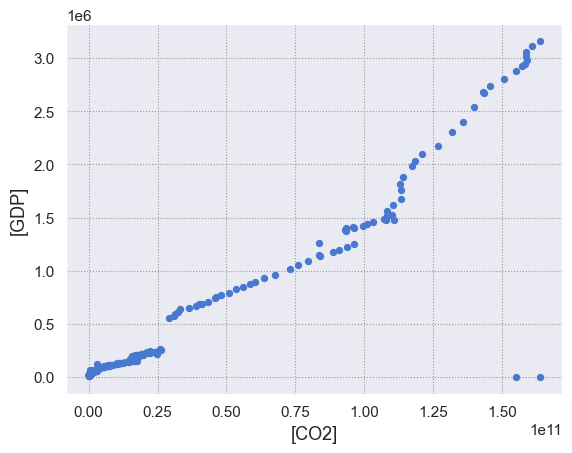

In [52]:
new_data = data_CO2_GDP.groupby(['Year']).sum()
new_data.plot.scatter(x=['CO2'], y=['GDP'])

In [115]:
data_CO2

,Entity,Year,CO2
240,Afghanistan,1990,2603238
241,Afghanistan,1991,2427366
242,Afghanistan,1992,1379462
243,Afghanistan,1993,1333055
244,Afghanistan,1994,1281602
...,...,...,...
66930,Zimbabwe,2014,11905687
66931,Zimbabwe,2015,12225821
66932,Zimbabwe,2016,10737567
66933,Zimbabwe,2017,9581633


In [105]:
data_CO2

,Entity,Year,CO2
200,Afghanistan,1950,84272
201,Afghanistan,1951,91600
202,Afghanistan,1952,91600
203,Afghanistan,1953,106256
204,Afghanistan,1954,106256
...,...,...,...
66930,Zimbabwe,2014,11905687
66931,Zimbabwe,2015,12225821
66932,Zimbabwe,2016,10737567
66933,Zimbabwe,2017,9581633


In [89]:
data_GDP

,Entity,Year,GDP
0,Afghanistan,1950,1156.000000
1,Afghanistan,1951,1170.000000
2,Afghanistan,1952,1189.000000
3,Afghanistan,1953,1240.000000
4,Afghanistan,1954,1245.000000
...,...,...,...
19871,Zimbabwe,2014,1594.000000
19872,Zimbabwe,2015,1560.000000
19873,Zimbabwe,2016,1534.000000
19874,Zimbabwe,2017,1582.366211


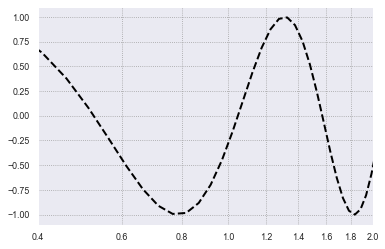

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np

x = np.linspace(0,2.5)
y = np.sin(x*6)
plt.plot(x,y, '--', color='k', zorder=1, lw=2)

plt.xlim(0.4,2.0)

plt.xscale('log')

xticks = [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
ticklabels = ['0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0']
plt.xticks(xticks, ticklabels)

plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.show()